Step1: Reading and understanding Data

In [527]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [528]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [529]:
#importing day.csv
df_day = pd.read_csv("/Users/amirthagadeswarangowrissankar/Downloads/day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Data Preparation

In [530]:
#Check for null
df_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Step2: Data Visualization

EDA

Check how the variables are oorelated

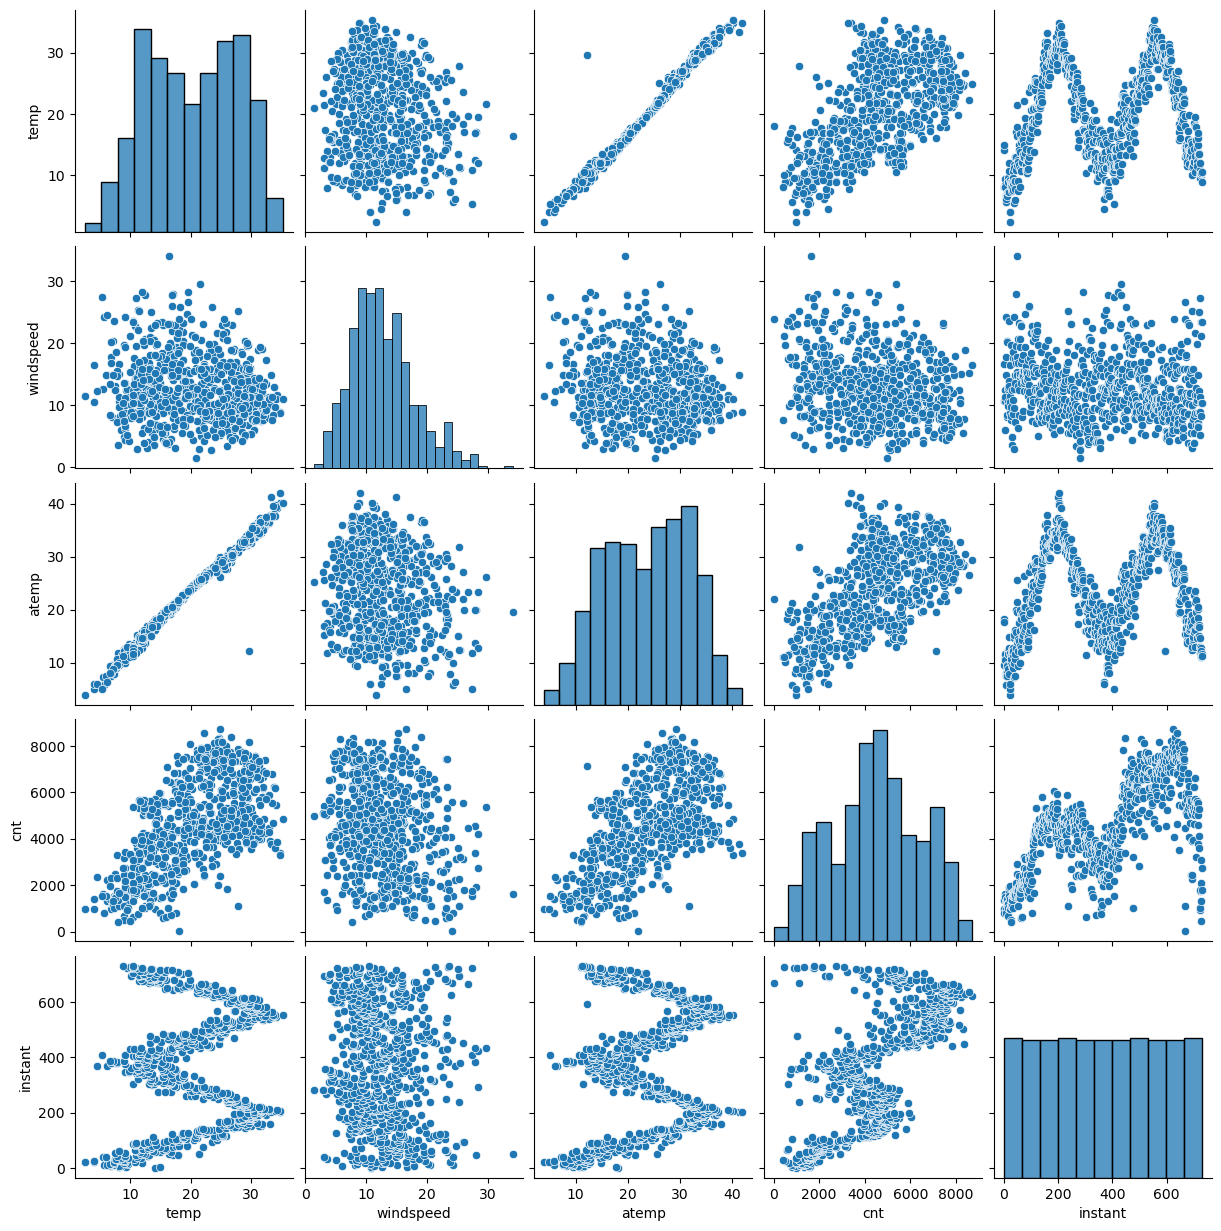

In [531]:
#Pairplot for numeric variables
sns.pairplot(df_day, vars=["temp",'windspeed','atemp','cnt','instant'])
plt.show()

Some of the variables are positively oorelated to the count variable

Use box plot to see the distribuition of data

<Axes: xlabel='weekday', ylabel='cnt'>

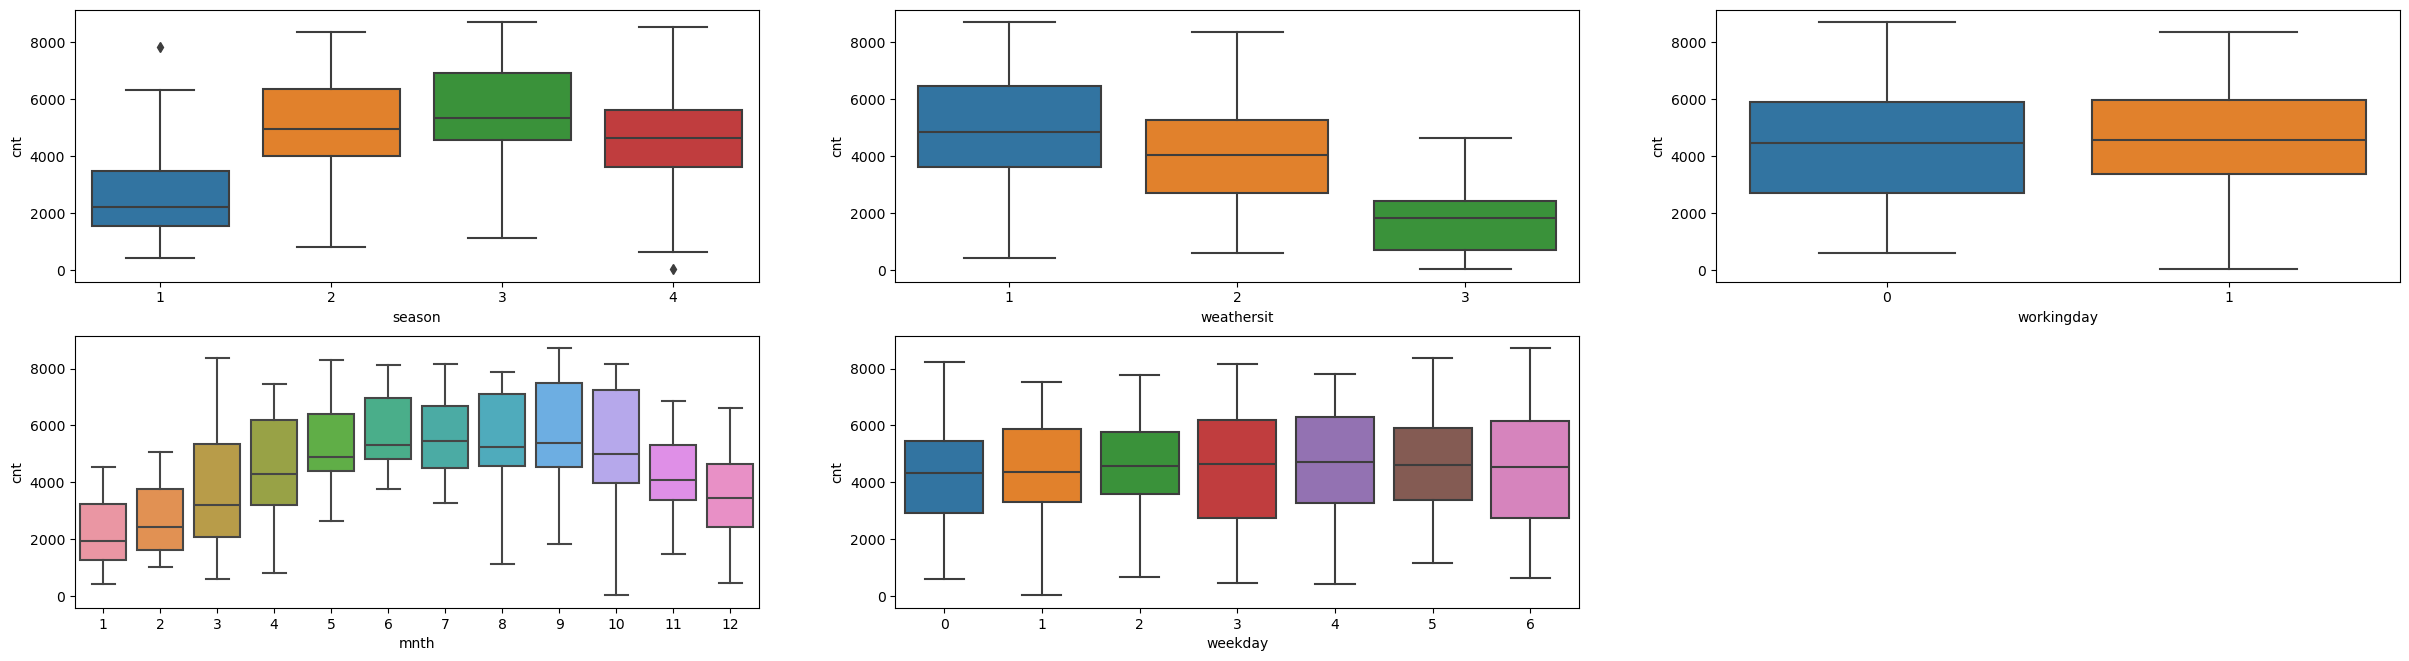

In [532]:
plt.figure(figsize=(30, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_day)

plt.subplot(3,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_day)

plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_day)

plt.subplot(3,3,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_day)

plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_day)

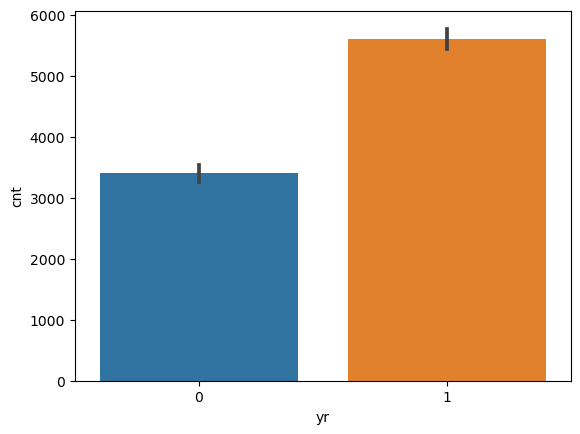

In [533]:
#Relation between Year and count of bike rentals
sns.barplot(x='yr',y='cnt',data=df_day)
plt.show()

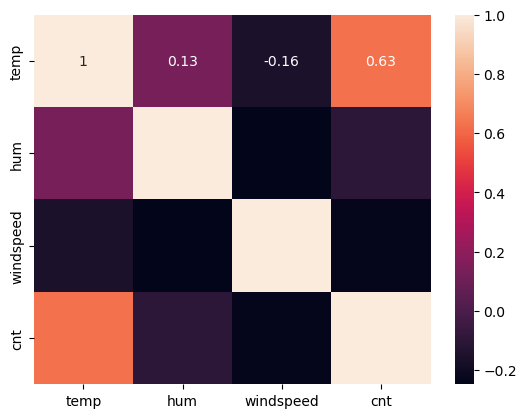

In [475]:
corr_df= df_day[['temp','hum','windspeed','cnt']].corr()
sns.heatmap(corr_df, 
            xticklabels=corr_df.columns.values,
            yticklabels=corr_df.columns.values,annot= True)
plt.show()


Step 3: Data preparation

Dummy Variables


The variable season has 4 values corresponding to each season. We need to convert these into dummy variables for each season

In [538]:
# Get dummy variables for each season
status_season = pd.get_dummies(df_day['season']).astype(int)
#rename columns to season names
status_season.rename(columns={1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace=True)
status_season.head()

,spring,summer,fall,winter
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


Now we have 4 columns for seasons. To build a model, we have seen the n-1 variables are enough to describe on status. 

We will drop the winter column as the season can be identified with just 3 columns as:


100 - Spring
010 - Summer
001 - fall
000 - Winter

Lets drop the last column from status_season

In [541]:
status_season =status_season.drop(labels='winter', axis=1)
status_season.head()

,spring,summer,fall
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


Add results to original day dataframe after assigingin dummy variables to season

In [542]:
#add results to original day dataframe
df_day = pd.concat([df_day, status_season], axis=1)
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,fall
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


Drop season from day dataframe as we have created dummies for it

In [543]:
df_day = df_day.drop(labels='season', axis=1)
df_day.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,fall
0,1,01-01-2018,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,2,02-01-2018,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,3,03-01-2018,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,4,04-01-2018,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,5,05-01-2018,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


The variable weathersit has 3 values corresponding. We need to convert these into dummy variables for each for each of the value

In [480]:
# Get dummy variables for each weathersit
status_weathersit = pd.get_dummies(df_day['weathersit']).astype(int)
#rename columns to weathersit names
status_weathersit.rename(columns={1:"Sit1", 2:"Sit2", 3:"Sit3"},inplace=True)
status_weathersit.head()

,Sit1,Sit2,Sit3
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


Now we have 3 columns for seasons. 

To build a model, we have seen the n-1 variables are enough to describe on status.

We will drop the Sit3 column as the weathersit can be identified with just 2 columns as:


10 - Sit1
01 - Sit2
00 - Sit3

In [545]:
status_weathersit =status_weathersit.drop(labels='Sit3', axis=1)
status_weathersit.head()

,Sit1,Sit2
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [546]:
#add results to original day dataframe
df_day = pd.concat([df_day, status_weathersit], axis=1)
df_day.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,fall,Sit1,Sit2
0,1,01-01-2018,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1
1,2,02-01-2018,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1
2,3,03-01-2018,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,1,0
3,4,04-01-2018,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,1,0
4,5,05-01-2018,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,1,0


In [547]:
#Drop weathersit from day dataframe as we have created dummies for it
df_day = df_day.drop(labels='weathersit', axis=1)
df_day.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,fall,Sit1,Sit2
0,1,01-01-2018,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1
1,2,02-01-2018,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1
2,3,03-01-2018,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,1,0
3,4,04-01-2018,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,1,0
4,5,05-01-2018,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,1,0


We will drop dte day and instant as we will not use them both in our analysis. dteday is full of date variables and instant is looking like serial numbers assigned to the records

In [548]:
#We will drop dte day and instant

df_day = df_day.drop(labels=['instant','dteday','casual', 'registered'], axis=1)
df_day.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,fall,Sit1,Sit2
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,1,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,1,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,1,0


The variable mnth has 12 values. Lets create dumy variable for it


In [549]:
# Get dummy variables for each mnth
status_mnth = pd.get_dummies(df_day['mnth']).astype(int)
#rename columns to weathersit names
status_mnth.rename(columns={1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"},inplace=True)
status_mnth.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


Now we have 12 month variables

We would need only 11 status variables

In [550]:
status_mnth =status_mnth.drop(labels='Dec', axis=1)
status_mnth.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov
0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0


In [551]:
#add results to original day dataframe
df_day = pd.concat([df_day, status_mnth], axis=1)
df_day.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,...,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [552]:
df_day = df_day.drop(labels=['mnth'], axis=1)
df_day.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov
0,0,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,0


Lets deal with dummy variables for Weekday column

In [554]:
# Get dummy variables for each weekday
status_weekday = pd.get_dummies(df_day['weekday']).astype(int)
#rename columns to weathersit names
status_weekday.rename(columns={0:"Sun", 1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat"},inplace=True)
status_weekday.head()

,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0


In [555]:
status_weekday =status_weekday.drop(labels='Sat', axis=1)
status_weekday.head()

,Sun,Mon,Tue,Wed,Thu,Fri
0,0,0,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,0,1,0,0,0
4,0,0,0,1,0,0


In [556]:
#add results to original day dataframe
df_day = pd.concat([df_day, status_weekday], axis=1)
df_day.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,Aug,Sep,Oct,Nov,Sun,Mon,Tue,Wed,Thu,Fri
0,0,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,1,0,0


In [557]:
df_day = df_day.drop(labels=['weekday'], axis=1)
df_day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Aug,Sep,Oct,Nov,Sun,Mon,Tue,Wed,Thu,Fri
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [558]:
df_day.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Aug,Sep,Oct,Nov,Sun,Mon,Tue,Wed,Thu,Fri
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.084932,0.082192,0.084932,0.082192,0.143836,0.143836,0.142466,0.141096,0.142466,0.142466
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.278971,0.274845,0.278971,0.274845,0.351164,0.351164,0.349767,0.348359,0.349767,0.349767
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Step 4: Splitting dataset into train and test

In [559]:
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(df_day, train_size = 0.7, random_state = 100)

In [560]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

Rescaling features for training models

Min Max Scaling

In [562]:
# Apply scaler() to all the columns except 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Aug,Sep,Oct,Nov,Sun,Mon,Tue,Wed,Thu,Fri
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


In [563]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Aug,Sep,Oct,Nov,Sun,Mon,Tue,Wed,Thu,Fri
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.096078,0.080392,0.084314,0.086275,0.143137,0.150980,0.131373,0.158824,0.133333,0.127451
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.294988,0.272166,0.278131,0.281045,0.350557,0.358381,0.338139,0.365870,0.340268,0.333805
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dividing into X and Y sets for the model building

In [564]:
y_train = df_train.pop('cnt')
X_train = df_train
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [565]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,fall,...,Aug,Sep,Oct,Nov,Sun,Mon,Tue,Wed,Thu,Fri
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,1,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,0,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,0,0,0,0,0,1


Step 5: Building the model

RFE

In [566]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [567]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [568]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('fall', False, 2),
 ('Sit1', True, 1),
 ('Sit2', True, 1),
 ('Jan', False, 12),
 ('Feb', False, 14),
 ('Mar', False, 8),
 ('Apr', False, 11),
 ('May', False, 9),
 ('Jun', False, 10),
 ('Jul', False, 13),
 ('Aug', False, 6),
 ('Sep', True, 1),
 ('Oct', False, 3),
 ('Nov', False, 15),
 ('Sun', False, 4),
 ('Mon', True, 1),
 ('Tue', True, 1),
 ('Wed', True, 1),
 ('Thu', True, 1),
 ('Fri', True, 1)]

In [569]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'Sit1', 'Sit2', 'Sep', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'],
      dtype='object')

In [570]:
X_train.columns[~rfe.support_]

Index(['atemp', 'summer', 'fall', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
       'Jul', 'Aug', 'Oct', 'Nov', 'Sun'],
      dtype='object')

In [571]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [572]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [573]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [574]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     168.5
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          5.68e-178
Time:                        14:08:17   Log-Likelihood:                 485.60
No. Observations:                 510   AIC:                            -941.2
Df Residuals:                     495   BIC:                            -877.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1292      0.047      2.776      0.0

In [575]:
X_train_new = X_train_rfe.drop(["Wed"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     168.5
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          5.68e-178
Time:                        14:08:26   Log-Likelihood:                 485.60
No. Observations:                 510   AIC:                            -941.2
Df Residuals:                     495   BIC:                            -877.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1292      0.047      2.776      0.0

In [576]:
X_train_new = X_train_new.drop(["Fri"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     181.8
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          4.17e-179
Time:                        14:08:36   Log-Likelihood:                 485.59
No. Observations:                 510   AIC:                            -943.2
Df Residuals:                     496   BIC:                            -883.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1291      0.046      2.777      0.0

In [577]:
X_train_new = X_train_new.drop(["Thu"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     197.2
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          3.47e-180
Time:                        14:08:44   Log-Likelihood:                 485.40
No. Observations:                 510   AIC:                            -944.8
Df Residuals:                     497   BIC:                            -889.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1285      0.046      2.766      0.0

In [580]:
X_train_new = X_train_new.drop(["Tue"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     215.1
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          3.53e-181
Time:                        14:09:07   Log-Likelihood:                 484.97
No. Observations:                 510   AIC:                            -945.9
Df Residuals:                     498   BIC:                            -895.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1306      0.046      2.815      0.0

In [581]:
X_train_new = X_train_new.drop(["Mon"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.4
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          3.90e-182
Time:                        14:09:16   Log-Likelihood:                 484.40
No. Observations:                 510   AIC:                            -946.8
Df Residuals:                     499   BIC:                            -900.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1316      0.046      2.837      0.0

Step 6: Residual Analysis

Text(0.5, 0, 'Errors')

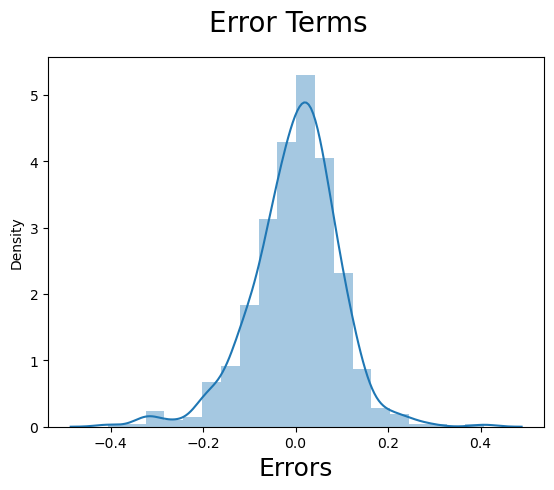

In [582]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Plot the histogram of the error terms
y_train_count = lm.predict(X_train_lm)
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

In [583]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'spring', 'Sit1', 'Sit2', 'Sep'],
      dtype='object')

In [584]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [585]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.19
7,Sit1,11.36
3,temp,11.09
8,Sit2,7.96
5,windspeed,4.21
2,workingday,3.22
0,yr,2.07
6,spring,2.05
9,Sep,1.16
1,holiday,1.09


Step 7: Predictions

In [586]:
# Apply scaler() to all the columns in the test data set
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Aug,Sep,Oct,Nov,Sun,Mon,Tue,Wed,Thu,Fri
184,0,1,0,0.837241,33.27085,0.534223,0.149393,0.704300,0,0,...,0,0,0,0,0,1,0,0,0,0
535,1,0,1,0.911423,36.04875,0.470417,0.231142,0.725421,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496221,22.85230,0.777843,0.443398,0.278853,0,0,...,0,0,1,0,0,0,0,0,1,0
221,0,0,1,0.890387,34.24915,0.236659,0.449707,0.545512,0,0,...,1,0,0,0,0,0,0,1,0,0
152,0,0,1,0.821739,32.19710,0.070765,0.682387,0.569148,0,1,...,0,0,0,0,0,0,0,0,1,0


In [587]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Aug,Sep,Oct,Nov,Sun,Mon,Tue,Wed,Thu,Fri
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.546074,24.250312,0.508362,0.418803,0.517923,0.254545,0.263636,...,0.059091,0.086364,0.086364,0.072727,0.145455,0.127273,0.168182,0.100000,0.163636,0.177273
std,0.500809,0.187620,0.459303,0.248645,8.281075,0.200875,0.187683,0.239498,0.436599,0.441609,...,0.236333,0.281541,0.281541,0.260281,0.353363,0.334038,0.374881,0.300684,0.370789,0.382770
min,0.000000,0.000000,0.000000,0.000000,4.941955,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.329310,17.090025,0.361079,0.284201,0.361045,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545492,24.700000,0.491299,0.403318,0.520681,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.756414,31.124313,0.650989,0.523975,0.687956,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,41.318550,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [588]:
y_test = df_test.pop('cnt')
X_test = df_test
y_test.head()

184    0.704300
535    0.725421
299    0.278853
221    0.545512
152    0.569148
Name: cnt, dtype: float64

In [589]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,fall,...,Aug,Sep,Oct,Nov,Sun,Mon,Tue,Wed,Thu,Fri
184,0,1,0,0.837241,33.27085,0.534223,0.149393,0,0,1,...,0,0,0,0,0,1,0,0,0,0
535,1,0,1,0.911423,36.04875,0.470417,0.231142,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496221,22.85230,0.777843,0.443398,0,0,0,...,0,0,1,0,0,0,0,0,1,0
221,0,0,1,0.890387,34.24915,0.236659,0.449707,0,0,1,...,1,0,0,0,0,0,0,1,0,0
152,0,0,1,0.821739,32.19710,0.070765,0.682387,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [590]:
X_train_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'Sit1', 'Sit2', 'Sep'],
      dtype='object')

In [591]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new1 = X_test[X_train_new.columns]
X_test_new1 = sm.add_constant(X_test_new1)
X_test_new1.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,Sit1,Sit2,Sep
184,1.0,0,1,0,0.837241,0.534223,0.149393,0,0,1,0
535,1.0,1,0,1,0.911423,0.470417,0.231142,0,1,0,0
299,1.0,0,0,1,0.496221,0.777843,0.443398,0,0,1,0
221,1.0,0,0,1,0.890387,0.236659,0.449707,0,1,0,0
152,1.0,0,0,1,0.821739,0.070765,0.682387,0,1,0,0


In [592]:
# Making predictions
y_pred = lm.predict(X_test_new1)

Finding R-Squared

In [593]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8029335088835352

In [594]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.8016833367717969)*(9-1)/(9-1-1)
print(Adj_r2)

0.7733523848820536


Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

<Figure size 640x480 with 0 Axes>

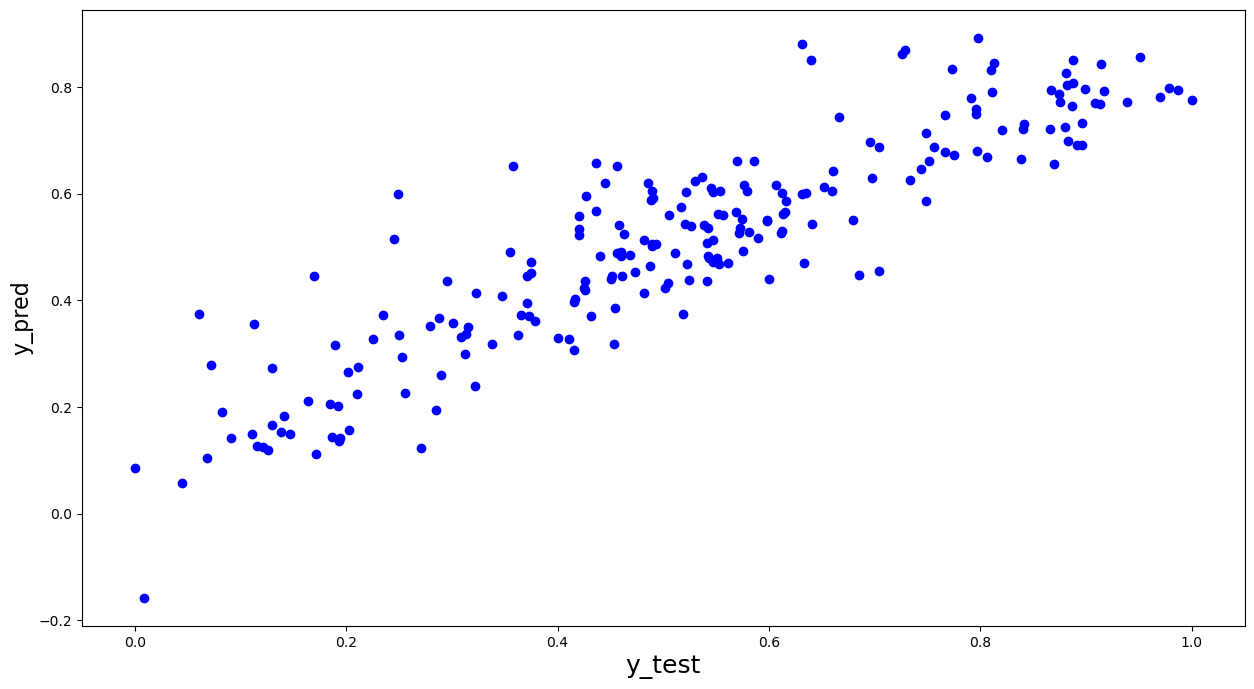

In [595]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

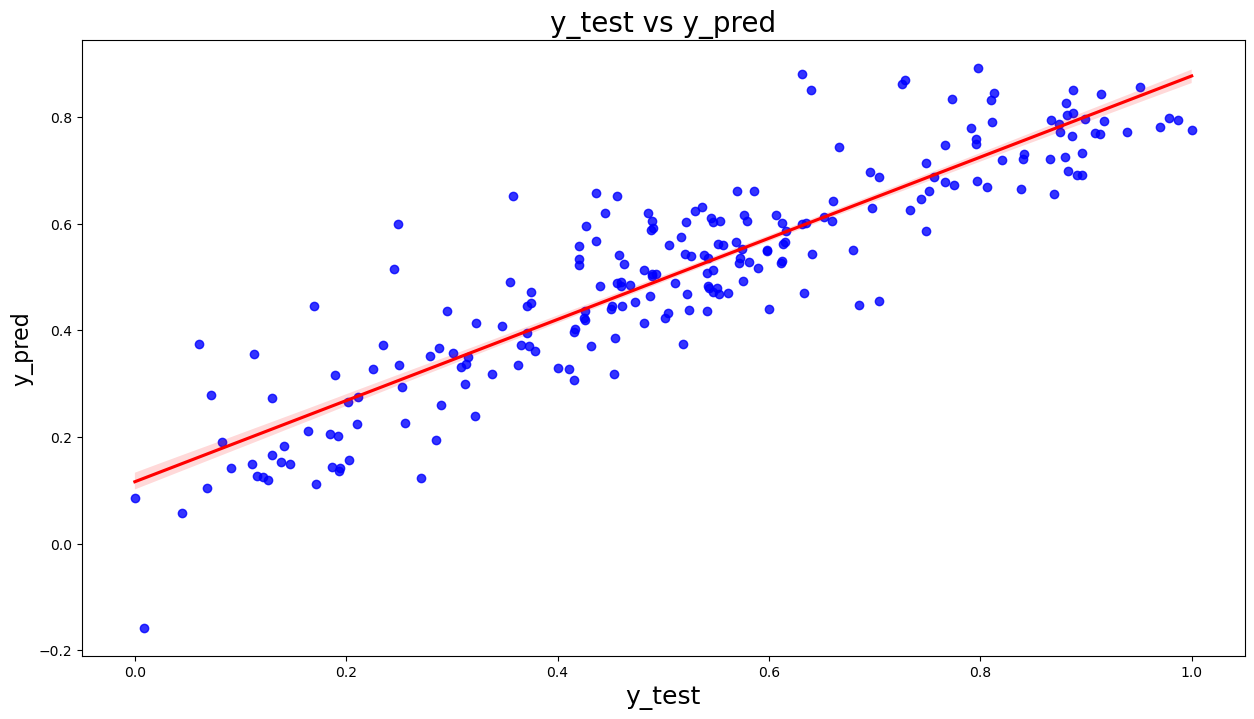

In [596]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()